In [30]:
import pandas as pd
import warnings

from scipy import stats
from itertools import combinations
from sklearn import preprocessing

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [32]:
warnings.simplefilter('ignore')

In [33]:
def mirror_d1d2_iter(df):
    for r1 in df.to_dict('records'):
        yield r1
        r2 = r1.copy()
        r2['d1'], r2['d2'] = r2['d2'], r2['d1']
        yield r2

In [34]:
def mirror_d1d2(df):
    return pd.DataFrame(list(mirror_d1d2_iter(df)))

# LSTM all-vs-all probability mass correlations

In [35]:
lstm_pcorr = pd.read_json('data/hl-graph-lstm-pcorr.json', lines=True)
lstm_pcorr = mirror_d1d2(lstm_pcorr)
lstm_pcorr = lstm_pcorr.drop(columns=['kt_p', 'pr_p', 'sp_p'])
lstm_pcorr = lstm_pcorr.set_index(['d1', 'd2'])
lstm_pcorr = lstm_pcorr.add_prefix('lstm_pcorr_')
lstm_pcorr = lstm_pcorr.reset_index()

In [36]:
lstm_pcorr.sort_values('lstm_pcorr_kt', ascending=False).head(10)

,d1,d2,lstm_pcorr_kt,lstm_pcorr_pr,lstm_pcorr_sp
52,bloomberg.com,wsj.com,0.544591,0.244900,0.730285
53,wsj.com,bloomberg.com,0.544591,0.244900,0.730285
59,dailycaller.com,breitbart.com,0.504639,0.235545,0.688357
58,breitbart.com,dailycaller.com,0.504639,0.235545,0.688357
203,wsj.com,nytimes.com,0.489553,0.158381,0.672381
202,nytimes.com,wsj.com,0.489553,0.158381,0.672381
184,msnbc.com,thehill.com,0.478135,0.121547,0.660237
185,thehill.com,msnbc.com,0.478135,0.121547,0.660237
190,npr.org,nytimes.com,0.468058,0.189297,0.645672
191,nytimes.com,npr.org,0.468058,0.189297,0.645672


# LSTM all-vs-all confusion counts

In [37]:
lstm_conf = pd.read_json('data/hl-graph-lstm-cm.json', lines=True)
lstm_conf = lstm_conf.set_index(['d1', 'd2'])
lstm_conf = lstm_conf.add_prefix('lstm_cm_')
lstm_conf = lstm_conf.reset_index()

In [38]:
lstm_conf.sort_values('lstm_cm_count', ascending=False).head(10)

,d1,d2,lstm_cm_count
197,wsj.com,bloomberg.com,362
72,dailycaller.com,breitbart.com,321
98,foxnews.com,apnews.com,275
27,bloomberg.com,wsj.com,267
177,thehill.com,msnbc.com,267
81,dailycaller.com,thehill.com,253
137,msnbc.com,thehill.com,232
64,cnn.com,msnbc.com,232
150,npr.org,nytimes.com,215
67,cnn.com,thehill.com,210


# A-vs-B accuracies, LR + SVC

In [39]:
ab_acc = pd.read_json('data/hl-graph-ab-acc.json', lines=True)
ab_acc = mirror_d1d2(ab_acc)

# Use 1-acc, so that high score -> high similarity.
ab_acc['inv_lr'] = 1 - ab_acc.acc_lr
ab_acc['inv_svc'] = 1 - ab_acc.acc_svc
ab_acc = ab_acc.drop(columns=['acc_lr', 'acc_svc'])

ab_acc = ab_acc.set_index(['d1', 'd2'])
ab_acc = ab_acc.add_prefix('ab_acc_')
ab_acc = ab_acc.reset_index()

In [40]:
ab_acc.sort_values('ab_acc_inv_lr', ascending=False).head(10)

,d1,d2,ab_acc_inv_lr,ab_acc_inv_svc
157,npr.org,nytimes.com,0.338326,0.332244
156,nytimes.com,npr.org,0.338326,0.332244
50,cnn.com,foxnews.com,0.324286,0.314910
51,foxnews.com,cnn.com,0.324286,0.314910
184,washingtonpost.com,npr.org,0.322073,0.314567
185,npr.org,washingtonpost.com,0.322073,0.314567
161,washingtonpost.com,nytimes.com,0.315189,0.314865
160,nytimes.com,washingtonpost.com,0.315189,0.314865
22,bloomberg.com,wsj.com,0.314593,0.309884
23,wsj.com,bloomberg.com,0.314593,0.309884


# A-vs-B confusion counts, LR

In [43]:
ab_cm_lr = pd.read_json('data/hl-graph-ab-cm-lr.json', lines=True)
ab_cm_lr = ab_cm_lr.rename(columns={'count': 'ab_cm_lr_count'})

In [44]:
ab_cm_lr.sort_values('ab_cm_lr_count', ascending=False).head(10)

,ab_cm_lr_count,d1,d2
65,6,cnn.com,bloomberg.com
74,5,cnn.com,nytimes.com
14,5,apnews.com,washingtonpost.com
177,5,nytimes.com,bloomberg.com
46,5,breitbart.com,washingtonpost.com
187,5,nytimes.com,rt.com
27,5,bloomberg.com,rt.com
139,5,huffingtonpost.com,rt.com
134,5,huffingtonpost.com,dailykos.com
20,5,bloomberg.com,dailycaller.com


# A-vs-B confusions counts, SVC

In [45]:
ab_cm_svc = pd.read_json('data/hl-graph-ab-cm-svc.json', lines=True)
ab_cm_svc = ab_cm_svc.rename(columns={'count': 'ab_cm_svc_count'})

In [46]:
ab_cm_svc.sort_values('ab_cm_svc_count', ascending=False).head(10)

,ab_cm_svc_count,d1,d2
214,6,sputniknews.com,dailykos.com
80,5,dailycaller.com,apnews.com
149,5,msnbc.com,dailycaller.com
2,5,apnews.com,buzzfeed.com
262,5,wsj.com,dailykos.com
39,5,breitbart.com,huffingtonpost.com
251,5,washingtonpost.com,nytimes.com
12,5,apnews.com,sputniknews.com
171,5,npr.org,rt.com
255,5,washingtonpost.com,wsj.com


# All-vs-all confusion counts, LR

In [47]:
ava_cm_lr = pd.read_json('data/hl-graph-ava-cm-lr.json', lines=True)
ava_cm_lr = ava_cm_lr.rename(columns={'count': 'ava_cm_lr_count'})

In [48]:
ava_cm_lr.sort_values('ava_cm_lr_count', ascending=False).head(10)

,ava_cm_lr_count,d1,d2
152,4,msnbc.com,huffingtonpost.com
39,3,breitbart.com,huffingtonpost.com
264,3,wsj.com,huffingtonpost.com
209,2,sputniknews.com,bloomberg.com
71,2,cnn.com,huffingtonpost.com
168,2,npr.org,huffingtonpost.com
119,2,foxnews.com,huffingtonpost.com
103,2,dailykos.com,huffingtonpost.com
87,2,dailycaller.com,huffingtonpost.com
225,2,thehill.com,bloomberg.com


# All-vs-all confusion counts, SVC

In [49]:
ava_cm_svc = pd.read_json('data/hl-graph-ava-cm-svc.json', lines=True)
ava_cm_svc = ava_cm_svc.rename(columns={'count': 'ava_cm_svc_count'})

In [50]:
ava_cm_svc.sort_values('ava_cm_svc_count', ascending=False).head(10)

,ava_cm_svc_count,d1,d2
191,2,nytimes.com,wsj.com
73,2,cnn.com,npr.org
101,2,dailykos.com,dailycaller.com
158,2,msnbc.com,washingtonpost.com
130,2,huffingtonpost.com,breitbart.com
144,1,msnbc.com,apnews.com
229,1,thehill.com,dailycaller.com
242,1,washingtonpost.com,breitbart.com
32,1,breitbart.com,apnews.com
117,1,foxnews.com,dailycaller.com


# All metrics

In [51]:
df = lstm_pcorr.merge(lstm_conf).merge(ab_acc).merge(ab_cm_lr).merge(ab_cm_svc).merge(ava_cm_lr).merge(ava_cm_svc)

In [53]:
df.sort_values('lstm_cm_count', ascending=False).head(10)

,d1,d2,lstm_pcorr_kt,lstm_pcorr_pr,lstm_pcorr_sp,lstm_cm_count,ab_acc_inv_lr,ab_acc_inv_svc,ab_cm_lr_count,ab_cm_svc_count,ava_cm_lr_count,ava_cm_svc_count
53,wsj.com,bloomberg.com,0.544591,0.244900,0.730285,362,0.314593,0.309884,2,0,0,0
59,dailycaller.com,breitbart.com,0.504639,0.235545,0.688357,321,0.302224,0.295565,4,3,0,1
13,foxnews.com,apnews.com,0.240590,0.096741,0.343792,275,0.299040,0.293665,3,0,0,1
185,thehill.com,msnbc.com,0.478135,0.121547,0.660237,267,0.273898,0.264022,4,1,0,0
52,bloomberg.com,wsj.com,0.544591,0.244900,0.730285,267,0.314593,0.309884,2,3,0,0
132,dailycaller.com,thehill.com,0.426649,0.138389,0.597465,253,0.279767,0.268648,0,1,0,0
184,msnbc.com,thehill.com,0.478135,0.121547,0.660237,232,0.273898,0.264022,0,2,0,1
108,cnn.com,msnbc.com,0.409234,0.152077,0.573168,232,0.255859,0.247469,3,1,0,0
190,npr.org,nytimes.com,0.468058,0.189297,0.645672,215,0.338326,0.332244,4,4,0,0
114,cnn.com,thehill.com,0.266552,0.052812,0.386499,210,0.276821,0.271013,4,1,0,0


Group on `d1`, scale scores with other outlets.

In [54]:
for col in set(df.columns) - {'d1', 'd2', 'label'}:
    df[f'{col}_scaled'] = df.groupby('d1')[col].transform(preprocessing.scale)

In [55]:
df['label'] = df[['d1', 'd2']].apply(lambda x: f'{x[0]} - {x[1]}', axis=1)

In [56]:
df_melted = df.melt(['d1', 'd2', 'label'], [c for c in df.columns if c.endswith('_scaled')])

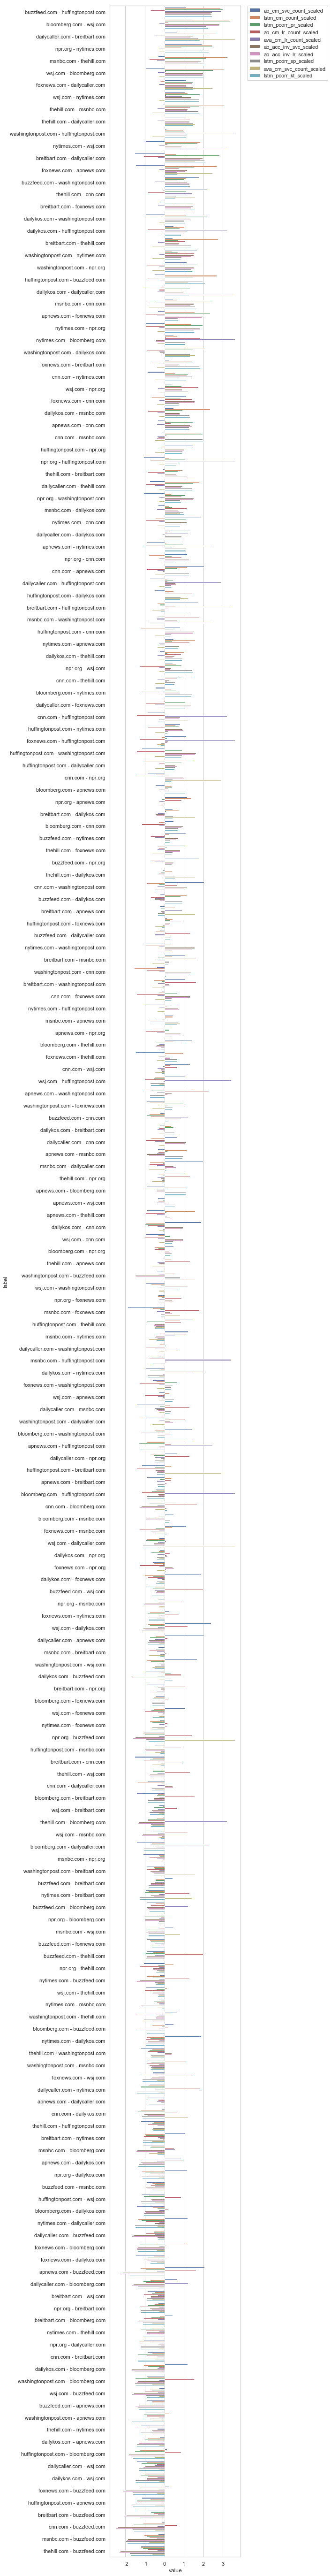

In [57]:
# Sort by mean score.
order = df_melted.groupby('label').mean().sort_values('value', ascending=False).index

plt.figure(figsize=(5,100))
ax = sns.barplot(x='value', y='label', data=df_melted, hue='variable', order=order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)